**Linear Regression to Predict Energy Consumption in Indonesia**

**Kelompok 4_KB22**

Pada kasus ini, akan digunakan regresi linear untuk memprediksi besar konsumnsi energi di Indonesia menggunakan dataset yang diambil dari kaggle berjudul 'What are the safest and cleanest sources of energy'

**Import some library**

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Pada dataset 'What are the safest and cleanest sources of energy' terdapat banyak data seperti dampak, death rate, dan biaya energi per sumbernya. Namun, data yang dibutuhkan dan juga paling lengkap adalah data mengenai konsumsi energi sehingga kita hanya akan mengambil data dari salah satu sheet yang ada di file excel

In [80]:
file = pd.ExcelFile('What are the safest and cleanest sources of energy.xlsx')
df = pd.read_excel(file, 'energy consumption by sources')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6560 entries, 0 to 6559
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    6560 non-null   object 
 1   Code                      5515 non-null   object 
 2   Year                      6560 non-null   int64  
 3   Oil Consumption - EJ      5184 non-null   float64
 4   Gas Consumption - EJ      5170 non-null   float64
 5   Coal Consumption - EJ     5170 non-null   float64
 6   Solar Consumption - EJ    5170 non-null   float64
 7   Hydro Consumption - EJ    5170 non-null   float64
 8   Nuclear Consumption - EJ  5170 non-null   float64
 9   Wind Consumption - EJ     5170 non-null   float64
 10  Geo Biomass Other - EJ    5170 non-null   float64
 11  Biofuels (TWh)            5660 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 615.1+ KB


,Entity,Code,Year,Oil Consumption - EJ,Gas Consumption - EJ,Coal Consumption - EJ,Solar Consumption - EJ,Hydro Consumption - EJ,Nuclear Consumption - EJ,Wind Consumption - EJ,Geo Biomass Other - EJ,Biofuels (TWh)
0,Africa,NaN,1965,325.900637,9.543762,323.496397,0.0,38.626795,0.0,0.0,0.0,0.0
1,Africa,NaN,1966,356.709630,10.669925,323.122452,0.0,43.083379,0.0,0.0,0.0,0.0
2,Africa,NaN,1967,353.833321,10.545678,330.291849,0.0,44.974026,0.0,0.0,0.0,0.0
3,Africa,NaN,1968,373.394345,10.688978,343.513186,0.0,52.606544,0.0,0.0,0.0,0.0
4,Africa,NaN,1969,378.536268,12.492010,346.643199,0.0,61.391409,0.0,0.0,0.0,0.0


Karena kita hanya memprediksi data pada negara Indonesia maka data negara lain perlu dihapus

In [81]:
# Delect rows based on inverse of column values
df1 = df[~(df['Entity'] == "Indonesia")].index 
df.drop(df1, inplace = True)
df.head()

,Entity,Code,Year,Oil Consumption - EJ,Gas Consumption - EJ,Coal Consumption - EJ,Solar Consumption - EJ,Hydro Consumption - EJ,Nuclear Consumption - EJ,Wind Consumption - EJ,Geo Biomass Other - EJ,Biofuels (TWh)
2500,Indonesia,IDN,1965,72.543680,5.075004,1.500271,0.0,5.070038,0.0,0.0,0.0,0.0
2501,Indonesia,IDN,1966,69.864521,5.176504,1.837541,0.0,6.592277,0.0,0.0,0.0,0.0
2502,Indonesia,IDN,1967,67.402853,6.323455,1.290931,0.0,7.402501,0.0,0.0,0.0,0.0
2503,Indonesia,IDN,1968,71.299362,6.424955,0.965291,0.0,9.145710,0.0,0.0,0.0,0.0
2504,Indonesia,IDN,1969,76.334142,12.108960,1.163001,0.0,9.563098,0.0,0.0,0.0,0.0


Saat ini hanya tersisa data di negara Indonesia sehingga kolom entity sudah tidak diperlukan dan dapat dihapus.
Kolom code juga dapat dihapus karena tidak mempengaruhi hasil

In [82]:
# Membuang kolom yang tidak dibutuhkan
to_drop = ['Code', 'Entity']
df.drop(to_drop, inplace=True, axis=1)
df.head()

,Year,Oil Consumption - EJ,Gas Consumption - EJ,Coal Consumption - EJ,Solar Consumption - EJ,Hydro Consumption - EJ,Nuclear Consumption - EJ,Wind Consumption - EJ,Geo Biomass Other - EJ,Biofuels (TWh)
2500,1965,72.543680,5.075004,1.500271,0.0,5.070038,0.0,0.0,0.0,0.0
2501,1966,69.864521,5.176504,1.837541,0.0,6.592277,0.0,0.0,0.0,0.0
2502,1967,67.402853,6.323455,1.290931,0.0,7.402501,0.0,0.0,0.0,0.0
2503,1968,71.299362,6.424955,0.965291,0.0,9.145710,0.0,0.0,0.0,0.0
2504,1969,76.334142,12.108960,1.163001,0.0,9.563098,0.0,0.0,0.0,0.0


Setelah mendapatkan tipe data yang dibutuhkan, distribusi data ditampilkan menggunakan seaborn

In [84]:
# convert to long (tidy) form
dfm = df.melt('Year', var_name='source', value_name='vals')

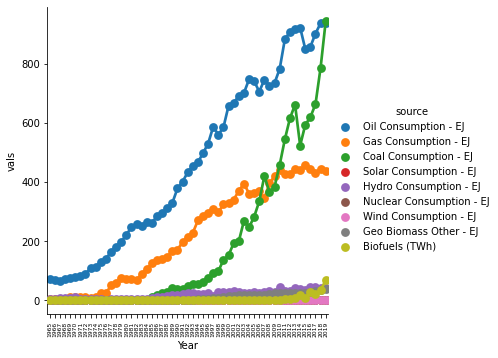

In [85]:
g = sns.catplot(x="Year", y="vals", hue='source', data=dfm, kind='point')
g.set_xticklabels(rotation=90, fontsize=6)


<AxesSubplot:xlabel='Oil Consumption - EJ'>

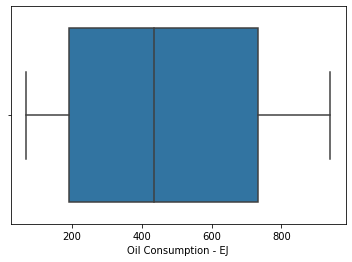

In [86]:
sns.boxplot(x=df['Oil Consumption - EJ'])

<AxesSubplot:xlabel='Gas Consumption - EJ'>

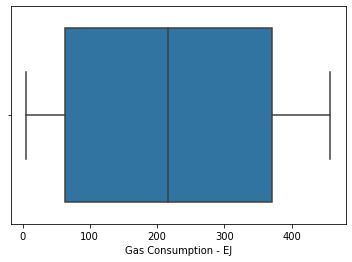

In [87]:
sns.boxplot(x=df['Gas Consumption - EJ'])

<AxesSubplot:xlabel='Coal Consumption - EJ'>

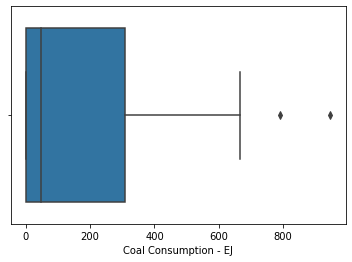

In [88]:
sns.boxplot(x=df["Coal Consumption - EJ"])

<AxesSubplot:xlabel='Hydro Consumption - EJ'>

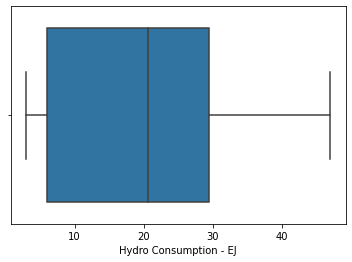

In [89]:
sns.boxplot(x=df['Hydro Consumption - EJ'])

<AxesSubplot:xlabel='Geo Biomass Other - EJ'>

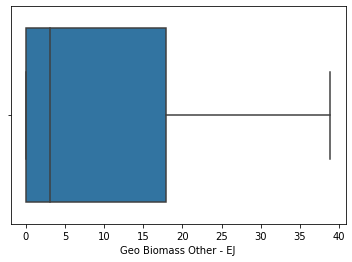

In [90]:
sns.boxplot(x=df['Geo Biomass Other - EJ'])

# **Membuat Model Regresi Linear**

Mengimport modul untuk regresi linear dari modul sklearn

In [91]:
import sklearn
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [92]:
X = df[['Year']]
y = df[['Oil Consumption - EJ', 
        'Gas Consumption - EJ', 
        "Coal Consumption - EJ", 
        "Solar Consumption - EJ", 
        "Hydro Consumption - EJ", 
        "Nuclear Consumption - EJ",
        'Wind Consumption - EJ',
        'Geo Biomass Other - EJ',
        'Biofuels (TWh)']]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
X, y , test_size = 0.2, random_state=101)

In [94]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [95]:
lm.coef_

array([[1.85382414e+01],
       [1.02455550e+01],
       [1.40223410e+01],
       [8.47323155e-04],
       [8.15811328e-01],
       [0.00000000e+00],
       [2.23748203e-03],
       [6.75518714e-01],
       [4.28828432e-01]])

In [96]:
from sklearn.metrics import mean_absolute_error
y_train_pred = lm.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
print('training data MAE : ', mae_train)

training data MAE :  20.5569246098949


In [97]:
from sklearn.metrics import mean_absolute_error
y_test_pred = lm.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('testing data MAE : ', mae_test)

testing data MAE :  19.290815545195187


In [98]:
lm.score(X_train, y_train)

0.6771184306878543

In [99]:
lm.score(X_test, y_test)

-79.42412713425603

## Korelasi Data

In [100]:
df.corr()

,Year,Oil Consumption - EJ,Gas Consumption - EJ,Coal Consumption - EJ,Solar Consumption - EJ,Hydro Consumption - EJ,Nuclear Consumption - EJ,Wind Consumption - EJ,Geo Biomass Other - EJ,Biofuels (TWh)
Year,1.000000,0.988494,0.982971,0.864873,0.457875,0.929570,NaN,0.343029,0.913135,0.510703
Oil Consumption - EJ,0.988494,1.000000,0.989217,0.882691,0.442367,0.938842,NaN,0.333400,0.936233,0.500236
Gas Consumption - EJ,0.982971,0.989217,1.000000,0.836318,0.383140,0.941765,NaN,0.280287,0.908402,0.437210
Coal Consumption - EJ,0.864873,0.882691,0.836318,1.000000,0.687066,0.862529,NaN,0.556610,0.968329,0.749037
Solar Consumption - EJ,0.457875,0.442367,0.383140,0.687066,1.000000,0.488075,NaN,0.766613,0.609638,0.975259
Hydro Consumption - EJ,0.929570,0.938842,0.941765,0.862529,0.488075,1.000000,NaN,0.334287,0.908516,0.535893
Nuclear Consumption - EJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wind Consumption - EJ,0.343029,0.333400,0.280287,0.556610,0.766613,0.334287,NaN,1.000000,0.492005,0.833600
Geo Biomass Other - EJ,0.913135,0.936233,0.908402,0.968329,0.609638,0.908516,NaN,0.492005,1.000000,0.665561
Biofuels (TWh),0.510703,0.500236,0.437210,0.749037,0.975259,0.535893,NaN,0.833600,0.665561,1.000000


# **Prediction**

Pada kesempatan kali ini, dilakukan prediksi konsumsi energi pada tahun 2030

In [103]:
predict = lm.predict(np.array([[2010]]))

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Display a coef from model

In [104]:
predict

array([[7.92424583e+02, 4.05687568e+02, 4.37277095e+02, 2.34292340e-02,
        3.48602601e+01, 0.00000000e+00, 6.10928750e-02, 2.17396137e+01,
        1.19366047e+01]])

**Dari model, prediksi konsumsi energi pada tahun 2030 untuk masing masing sumber adalah sebesar**
1. Oil Consumption      = 1163.189
2. Gas Consumption      = 610.598
3. Coal Consumption     = 717.723
4. Solar Consumption    = 0.04
5. Hydro Consumption    = 51.176
6. Nuclear Consumption  = 0
7. Wind Consumption     = 0.1058
8. Geo Biomass Other    = 35.249
9. Biofuels (TWh)       = 20.513
